In [201]:

import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [202]:
filename = 'titanic-1.xls'
df = pd.read_excel(filename)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [204]:
print('The average age is:', df['age'].mean() )

The average age is: 29.8811345124283


In [205]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [206]:
df.dropna(subset = ['fare'], inplace = True)

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [207]:
df.rename(columns = {'sex': 'gender'}, inplace = True)

In [208]:
df.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
dtype: int64

In [209]:
df.drop(columns = ['ticket', 'name', 'cabin', 'boat', 'body', 'home.dest', 'embarked'])

,pclass,survived,gender,age,sibsp,parch,fare
0,1,1,female,29.000000,0,0,211.3375
1,1,1,male,0.916700,1,2,151.5500
2,1,0,female,2.000000,1,2,151.5500
3,1,0,male,30.000000,1,2,151.5500
4,1,0,female,25.000000,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542
1305,3,0,female,29.881135,1,0,14.4542
1306,3,0,male,26.500000,0,0,7.2250
1307,3,0,male,27.000000,0,0,7.2250


In [210]:
df.count()

pclass       1308
survived     1308
name         1308
gender       1308
age          1308
sibsp        1308
parch        1308
ticket       1308
fare         1308
cabin         295
embarked     1306
boat          486
body          120
home.dest     745
dtype: int64

In [211]:
df.shape

(1308, 14)

In [212]:
df.dtypes

pclass         int64
survived       int64
name          object
gender        object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [213]:
#create a dataframe with columns to use in the model
modeldf = df[['gender', 'age', 'pclass', 'survived', 'sibsp', 'parch', 'fare']]
modeldf.head()

,gender,age,pclass,survived,sibsp,parch,fare
0,female,29.0000,1,1,0,0,211.3375
1,male,0.9167,1,1,1,2,151.5500
2,female,2.0000,1,0,1,2,151.5500
3,male,30.0000,1,0,1,2,151.5500
4,female,25.0000,1,0,1,2,151.5500


In [214]:
#transform gender column to binary values (0,1)
modeldf['gender'] = modeldf['gender'].map({'female': 0, 'male': 1})
modeldf.head()

C:\Users\tegen\AppData\Local\Temp/ipykernel_72612/201714561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldf['gender'] = modeldf['gender'].map({'female': 0, 'male': 1})


,gender,age,pclass,survived,sibsp,parch,fare
0,0,29.0000,1,1,0,0,211.3375
1,1,0.9167,1,1,1,2,151.5500
2,0,2.0000,1,0,1,2,151.5500
3,1,30.0000,1,0,1,2,151.5500
4,0,25.0000,1,0,1,2,151.5500


In [215]:
modeldf.corr()

,gender,age,pclass,survived,sibsp,parch,fare
gender,1.000000,0.056180,0.124198,-0.528483,-0.109369,-0.212934,-0.185523
age,0.056180,1.000000,-0.368798,-0.048887,-0.190305,-0.130355,0.171892
pclass,0.124198,-0.368798,1.000000,-0.312122,0.061162,0.018615,-0.558629
survived,-0.528483,-0.048887,-0.312122,1.000000,-0.028122,0.082418,0.244265
sibsp,-0.109369,-0.190305,0.061162,-0.028122,1.000000,0.373485,0.160238
parch,-0.212934,-0.130355,0.018615,0.082418,0.373485,1.000000,0.221539
fare,-0.185523,0.171892,-0.558629,0.244265,0.160238,0.221539,1.000000


In [216]:
#create a column to label if a passenger  well survived or badly survived 
modeldf['survival'] = np.where(df['survived']== 0, 0, 1)
 
#drop survived column
modeldf.drop('survived', axis=1, inplace = True)

C:\Users\tegen\AppData\Local\Temp/ipykernel_72612/1027400467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldf['survival'] = np.where(df['survived']== 0, 0, 1)
C:\Users\tegen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
#dataframe with predicting features
X = modeldf.drop('survival', axis = 1)

#column of predictive target values
y = modeldf['survival']

In [218]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)

In [219]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [220]:
#train the model to learn trends
gnb.fit(X_train, y_train)

GaussianNB()

In [221]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

0.7757390417940877

In [222]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [223]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted not survival', 'Predicted survival'],
    index=['True not survival', 'True survived']
)

cm

,Predicted not survival,Predicted survival
True not survival,167,37
True survived,34,89


In [224]:
#frequency of passed students to failed students in the test dataset
y_test.value_counts()

0    204
1    123
Name: survival, dtype: int64

In [225]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7828746177370031

In [226]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       204
           1       0.71      0.72      0.71       123

    accuracy                           0.78       327
   macro avg       0.77      0.77      0.77       327
weighted avg       0.78      0.78      0.78       327



In [227]:
      # Bernoulli Naïve Bayes function

In [228]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [229]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [230]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [231]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

0.7787971457696228

In [232]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [233]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted not survival', 'Predicted survival'],
    index=['True not survival', 'True survival']
)

cm

,Predicted not survival,Predicted survival
True not survival,167,37
True survival,34,89


In [234]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7828746177370031

In [235]:
# both Gaussian and Bernoulli Naïve models indicated similar predictions.

In [236]:
# let use  logistic regression model

In [237]:
###
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
df = pd.read_excel("titanic-1.xls")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [238]:
print('The average age is:', df['age'].mean() )

The average age is: 29.8811345124283


In [239]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [240]:
df.dropna(subset = ['fare'], inplace = True)

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [241]:
df.rename(columns = {'sex': 'gender'}, inplace = True)

In [242]:
df.drop(columns = ['ticket', 'name', 'cabin', 'boat', 'body', 'home.dest', 'embarked'])

,pclass,survived,gender,age,sibsp,parch,fare
0,1,1,female,29.000000,0,0,211.3375
1,1,1,male,0.916700,1,2,151.5500
2,1,0,female,2.000000,1,2,151.5500
3,1,0,male,30.000000,1,2,151.5500
4,1,0,female,25.000000,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542
1305,3,0,female,29.881135,1,0,14.4542
1306,3,0,male,26.500000,0,0,7.2250
1307,3,0,male,27.000000,0,0,7.2250


In [243]:
df.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
dtype: int64

In [244]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.043473
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,NaN
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.045032
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.097098
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.054217
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110
body,-0.043473,NaN,0.045032,-0.097098,0.054217,-0.043110,1.000000


0    808
1    500
Name: survived, dtype: int64


<AxesSubplot:xlabel='survived', ylabel='count'>

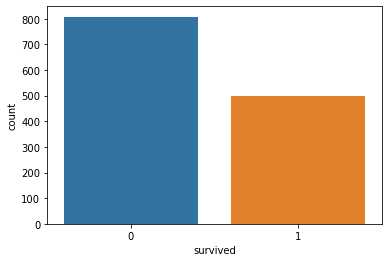

In [245]:
print(df["survived"].value_counts())

###

sns.countplot(data = df, x = "survived")

In [246]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('survived ~ age + pclass + gender + sibsp + parch + fare', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.462356
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1308
Model:                          Logit   Df Residuals:                     1301
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Jul 2022   Pseudo R-squ.:                  0.3049
Time:                        17:40:14   Log-Likelihood:                -604.76
converged:                       True   LL-Null:                       -870.03
Covariance Type:            nonrobust   LLR p-value:                2.213e-111
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4724      0.424     10.543      0.000       3.641       5.304
gender[T.male]    -2.5896      0.156    -16.571      0.000      -2.896      -2.283
age               -0.0363      0.006     -5.797      0.000      -0.049      -0.024
pclass            -0.9891      0.113     -8.788      0.000      -1.210      -0.769
sibsp             -0.3289      0.090     -3.647      0.000      -0.506      -0.152
parch             -0.0370      0.089     -0.415      0.678      -0.212       0.138
fare               0.0026      0.002      1.381      0.167      -0.001       0.006
==================================================================================
"""

In [247]:
mod1 = sm.logit('survived ~ age + gender + sibsp + pclass', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.463142
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1308
Model:                          Logit   Df Residuals:                     1303
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Jul 2022   Pseudo R-squ.:                  0.3037
Time:                        17:40:15   Log-Likelihood:                -605.79
converged:                       True   LL-Null:                       -870.03
Covariance Type:            nonrobust   LLR p-value:                4.624e-113
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.7168      0.383     12.305      0.000       3.965       5.468
gender[T.male]    -2.5967      0.153    -16.925      0.000      -2.897      -2.296
age               -0.0362      0.006     -5.793      0.000      -0.048      -0.024
sibsp             -0.3138      0.085     -3.687      0.000      -0.481      -0.147
pclass            -1.0717      0.096    -11.123      0.000      -1.260      -0.883
==================================================================================
"""

In [248]:
## print just the variable coefficient values

mod1.params

Intercept         4.716813
gender[T.male]   -2.596673
age              -0.036187
sibsp            -0.313777
pclass           -1.071661
dtype: float64

In [249]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,111.811322,8.541571e-35,Sig
gender[T.male],0.074521,2.950308e-64,Sig
age,0.964460,6.920596e-09,Sig
sibsp,0.730682,2.267968e-04,Sig
pclass,0.342439,9.717512e-29,Sig


In [250]:
## percent change = OR minus 1 multiplied by 100

df_odds["Pct Change"] = (df_odds["OR"] - 1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,111.811322,8.541571e-35,Sig,11081.132187
gender[T.male],0.074521,2.950308e-64,Sig,-92.547890
age,0.964460,6.920596e-09,Sig,-3.553990
sibsp,0.730682,2.267968e-04,Sig,-26.931808
pclass,0.342439,9.717512e-29,Sig,-65.756058


In [251]:
# all are significant for the increasing of survival rate
# as the Pct< 0, for every one unit increase in the above variable the probability of surviving decreasded by the value equal to their Pct change.